In [2]:
from typing import List

import os

import numpy as np

# plotting styles
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

mpl.rcParams['figure.dpi']= 150

In /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 an

In [3]:
def emulator_comparison_list(
    all_kfs: np.ndarray,
    all_pred_exacts: np.ndarray,
    all_labels: List,
    all_colors: List = ["C0", "C1", "C2"],
    plot_fcn=plt.loglog,
):

    for kf, pred_exacts, label, color in zip(
        all_kfs, all_pred_exacts, all_labels, all_colors
    ):
        # mean emulation error
        emulator_errors = np.abs(np.array(pred_exacts) - 1)

        plot_fcn(10 ** kf, np.mean(emulator_errors, axis=0), label=label, color=color)
        plt.fill_between(
            10 ** kf,
            y1=np.min(emulator_errors, axis=0),
            y2=np.max(emulator_errors, axis=0),
            color=color,
            alpha=0.3,
        )

    plt.legend()
    plt.ylabel(r"$| P_\mathrm{predicted}(k) / P_\mathrm{true}(k) - 1|$")
    plt.xlabel(r"$k (h/\mathrm{Mpc})$")


# SLHD versus LH optimal selection

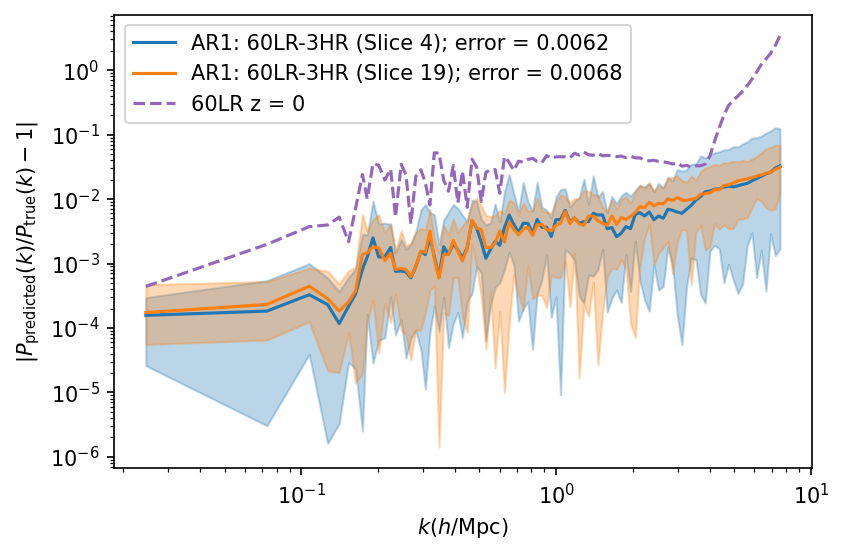

In [3]:
# z = 2, 4.2
base_dir_1 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-9-10-11_dmonly512_256mpc_mpgadgetpower/"
base_dir_2 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-57-58-59_dmonly512_256mpc_mpgadgetpower/"

# slice
s1 = 4
s2 = 19

base_dir_lf = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-0-1-2_dmonly512_256mpc_mpgadgetpower/"

kf = np.loadtxt(os.path.join(base_dir_1, "AR1/kf"))


pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "AR1/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts"))

emulator_comparison_list([kf, kf], [pred_exacts_1, pred_exacts_2],
                    ["AR1: 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "AR1: 60LR-3HR (Slice {}); error = {:.2g}".format(s2, np.mean(np.abs(pred_exacts_2 - 1)))
                    ],
                    )

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_lf, "AR1/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")

# lf_only  = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts_lf"))

# emulator_errors = np.abs(np.array(lf_only) - 1)
# plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C3", ls="--", label="Mean LF only z = 4.2")

plt.legend()
plt.savefig("../output_data_slhd/ar1_slice{}_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

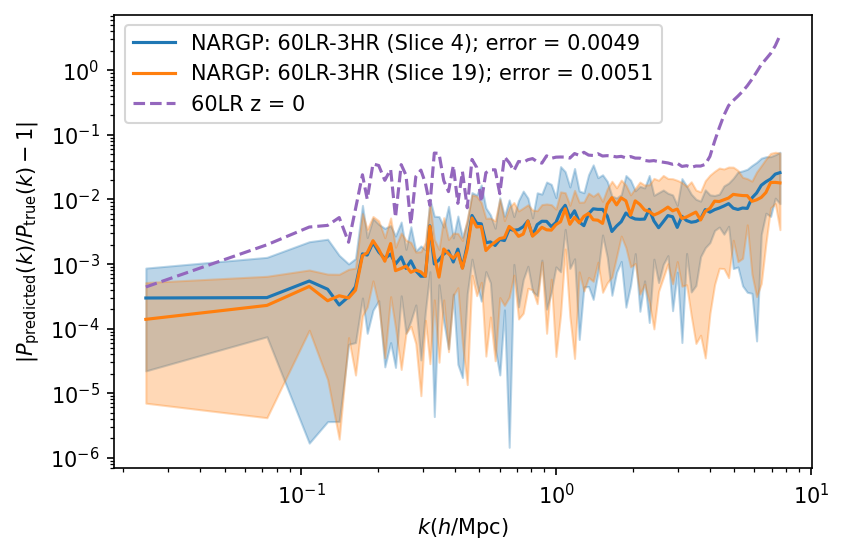

In [4]:
# z = 2, 4.2
base_dir_1 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-9-10-11_dmonly512_256mpc_mpgadgetpower/"
base_dir_2 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-57-58-59_dmonly512_256mpc_mpgadgetpower/"

# slice
s1 = 4
s2 = 19

base_dir_lf = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-0-1-2_dmonly512_256mpc_mpgadgetpower/"

kf = np.loadtxt(os.path.join(base_dir_1, "NARGP/kf"))


pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/pred_exacts"))

emulator_comparison_list([kf, kf], [pred_exacts_1, pred_exacts_2],
                    ["NARGP: 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "NARGP: 60LR-3HR (Slice {}); error = {:.2g}".format(s2, np.mean(np.abs(pred_exacts_2 - 1)))
                    ])

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_lf, "AR1/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")

# lf_only  = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts_lf"))

# emulator_errors = np.abs(np.array(lf_only) - 1)
# plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C3", ls="--", label="Mean LF only z = 4.2")

plt.legend()
plt.savefig("../output_data_slhd/nargp_slice{}_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

## Optimal selection versus SLHD

optimal selection, 21-31-56

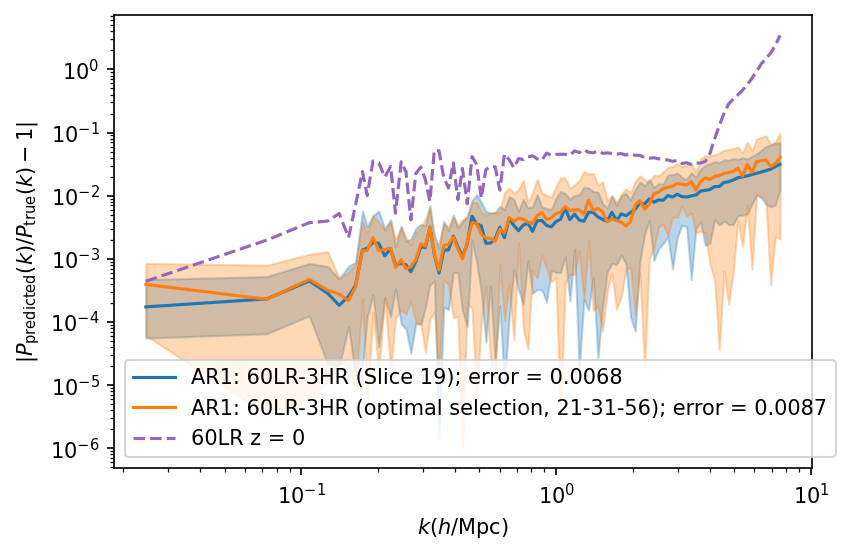

In [9]:
# z = 2, 4.2
base_dir_1 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-57-58-59_dmonly512_256mpc_mpgadgetpower/"
base_dir_2 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-21-31-56_dmonly512_256mpc_mpgadgetpower/"

# slice
s1 = 19

base_dir_lf = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-0-1-2_dmonly512_256mpc_mpgadgetpower/"

kf = np.loadtxt(os.path.join(base_dir_1, "AR1/kf"))


pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "AR1/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts"))

emulator_comparison_list([kf, kf], [pred_exacts_1, pred_exacts_2],
                    ["AR1: 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "AR1: 60LR-3HR (optimal selection, 21-31-56); error = {:.2g}".format(np.mean(np.abs(pred_exacts_2 - 1)))
                    ],
                    )

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_lf, "AR1/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")

# lf_only  = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts_lf"))

# emulator_errors = np.abs(np.array(lf_only) - 1)
# plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C3", ls="--", label="Mean LF only z = 4.2")

plt.legend()
plt.savefig("../output_data_slhd/ar1_optimal-selection_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

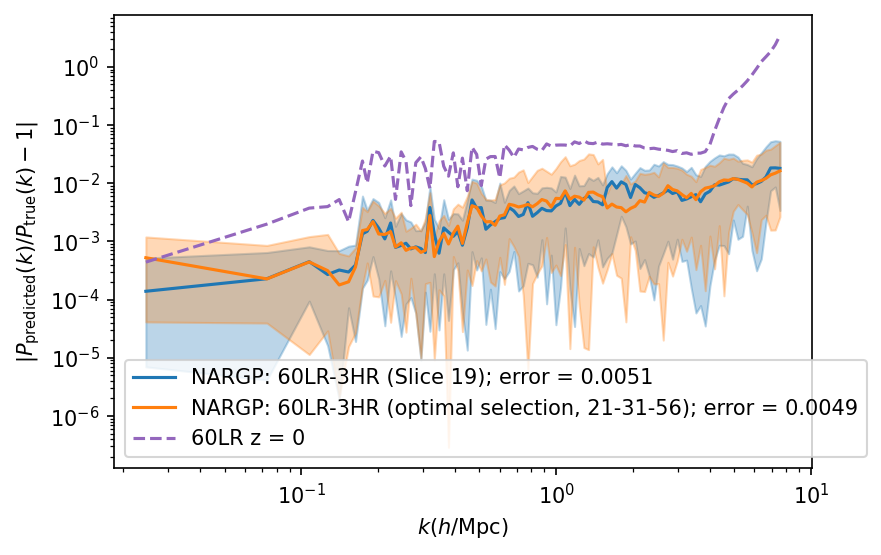

In [10]:
# z = 2, 4.2
base_dir_1 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-57-58-59_dmonly512_256mpc_mpgadgetpower/"
base_dir_2 = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-21-31-56_dmonly512_256mpc_mpgadgetpower/"

# slice
s1 = 19

base_dir_lf = "../output_data_slhd/slhd_60_dmonly256_256mpc_3-sl-0-1-2_dmonly512_256mpc_mpgadgetpower/"

kf = np.loadtxt(os.path.join(base_dir_1, "NARGP/kf"))


pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/pred_exacts"))

emulator_comparison_list([kf, kf], [pred_exacts_1, pred_exacts_2],
                    ["NARGP: 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "NARGP: 60LR-3HR (optimal selection, 21-31-56); error = {:.2g}".format(np.mean(np.abs(pred_exacts_2 - 1)))
                    ],
                    )

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_lf, "NARGP/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")

# lf_only  = np.loadtxt(os.path.join(base_dir_2, "AR1/pred_exacts_lf"))

# emulator_errors = np.abs(np.array(lf_only) - 1)
# plt.loglog(10**kf, np.mean(emulator_errors, axis=0), color="C3", ls="--", label="Mean LF only z = 4.2")

plt.legend()
plt.savefig("../output_data_slhd/nargp_optimal-selection_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

## Emulation errors versus LFEmu errors

## RBF versus Martern 5/2

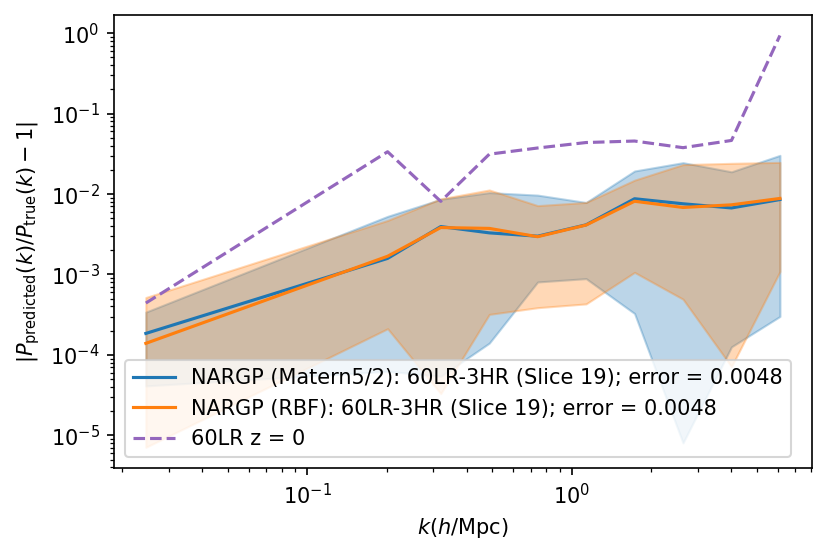

In [12]:
# z = 2, 4.2
base_dir_1 = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box256_3_res512box256_z0_ind-57-58-59/"
base_dir_2 = "../../matter_emu_dgmgp/data/output/RBF/Matterpower_60_res128box256_3_res512box256_z0_ind-57-58-59/"

# slice
s1 = 19

base_dir_lf = "../../matter_emu_dgmgp/data/output/RBF/Matterpower_60_res128box256_3_res512box256_z0_ind-57-58-59/"

kf1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/kf"))
kf2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/kf"))

kf1 = kf1[::10]
kf2 = kf2[::10]

pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/pred_exacts"))

emulator_comparison_list([kf1, kf2], [pred_exacts_1, pred_exacts_2],
                    ["NARGP (Matern5/2): 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "NARGP (RBF): 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_2 - 1)))
                    ],
                    )

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_lf, "NARGP/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf1, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")


plt.legend()
# plt.savefig("../output_data_slhd/nargp_optimal-selection_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

## Different boxsizes

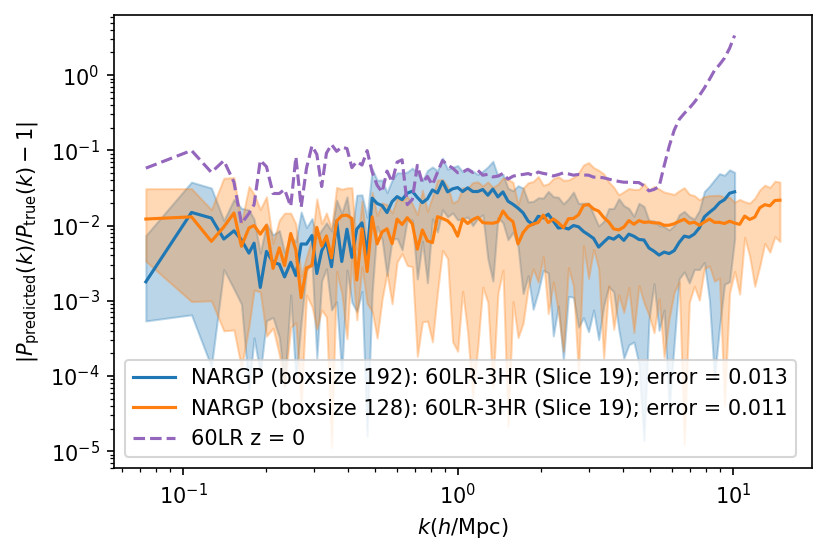

In [12]:
# z = 2, 4.2
base_dir_1 = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box192_3_res512box256_z0_ind-57-58-59/"
base_dir_2 = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box128_3_res512box256_z0_ind-57-58-59/"

# slice
s1 = 19

# base_dir_lf = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box256_3_res512box256_z0_ind-57-58-59/"

kf1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/kf"))
kf2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/kf"))

pred_exacts_1 = np.loadtxt(os.path.join(base_dir_1, "NARGP/pred_exacts"))
pred_exacts_2 = np.loadtxt(os.path.join(base_dir_2, "NARGP/pred_exacts"))

emulator_comparison_list([kf1, kf2], [pred_exacts_1, pred_exacts_2],
                    ["NARGP (boxsize 192): 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_1 - 1))),
                     "NARGP (boxsize 128): 60LR-3HR (Slice {}); error = {:.2g}".format(s1, np.mean(np.abs(pred_exacts_2 - 1)))
                    ],
                    )

# Add LF only
lf_only  = np.loadtxt(os.path.join(base_dir_1, "NARGP/pred_exacts_lf"))

emulator_errors = np.abs(np.array(lf_only) - 1)
plt.loglog(10**kf1, np.mean(emulator_errors, axis=0), color="C4", ls="--", label="60LR z = 0")


plt.legend()
# plt.savefig("../output_data_slhd/nargp_optimal-selection_slice{}.pdf".format(s1, s2), format="pdf", dpi=300)

### Hyperparameter determination

H3

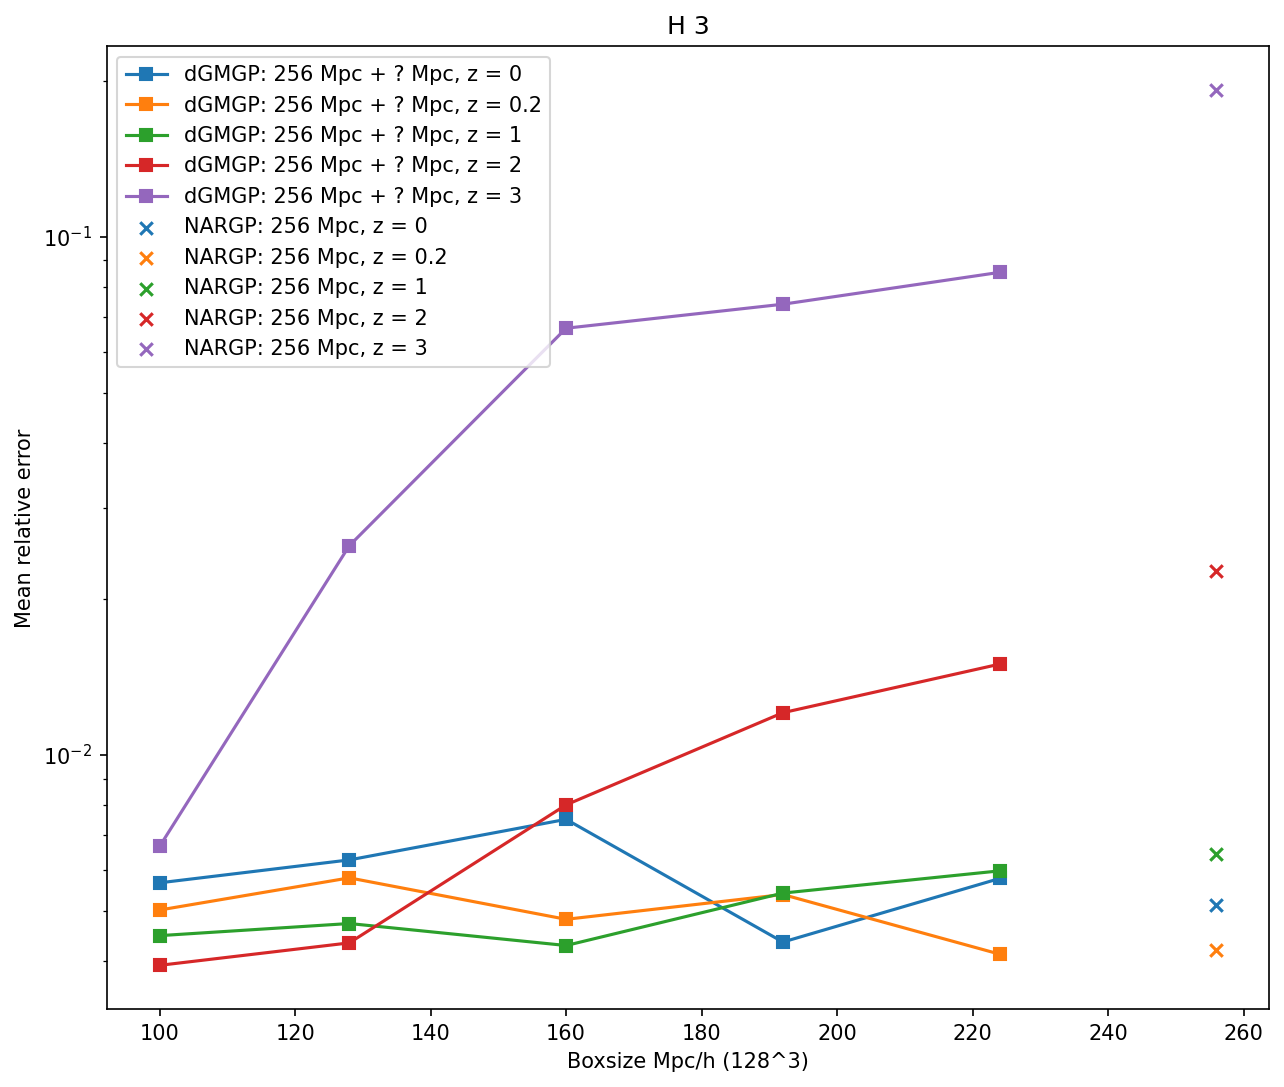

In [34]:
# mean particle spacing
k_mps = -100# 2 * np.pi * 128 / 512

type_mfemu = "dGMGP"

plt.figure(figsize=(10, 8.5))


z_errors = []
nargp_z_errors = []


for i,z in enumerate([0, 0.2, 1, 2, 3]):

    # load predictive errors
    # all boxsizes
    all_boxes = [100, 128, 160, 192, 224]



    # all filenames
    all_base_folders = [
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box100_3_H-res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box128_3_H-res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box160_3_H-res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box192_3_H-res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box224_3_H-res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_")),
    ]
    all_errors = []

    for base_dir in all_base_folders:
        ks = np.loadtxt(os.path.join(base_dir, type_mfemu, "kf"))

        pred_exacts = np.loadtxt(os.path.join(base_dir, type_mfemu, "pred_exacts"))

        ind = (10**ks > k_mps)

        error = np.abs(1 - pred_exacts).mean(axis=0)[ind]

        all_errors.append(np.mean(error))


    baseline = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box256_3_res512box256_z{}_ind-57-58-59/".format(str(z).replace(".", "_"))
    nargp_error = np.loadtxt(os.path.join(baseline, "NARGP", "pred_exacts"))
    ks = np.loadtxt(os.path.join(baseline, "NARGP", "kf"))
    ind = (10**ks > k_mps)
    nargp_error = np.abs(1 - nargp_error).mean(axis=0)[ind].mean()

    plt.semilogy(all_boxes, all_errors, "s-", label="dGMGP: 256 Mpc + ? Mpc, " + "z = {}".format(z), color="C{}".format(i))
    plt.scatter(256, nargp_error, marker="x", label="NARGP: 256 Mpc, " + "z = {}".format(z), color="C{}".format(i))


    
    # Append for later use
    z_errors.append(all_errors)
    nargp_z_errors.append(nargp_error)

    
plt.title("H 3")
plt.xlabel("Boxsize Mpc/h (128^3)")
plt.ylabel("Mean relative error")
plt.legend()

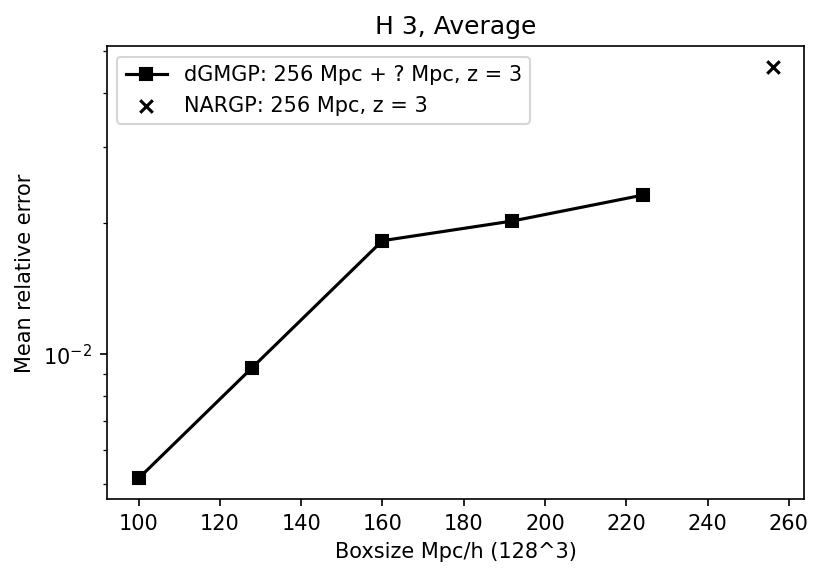

In [36]:

average_error = np.mean(z_errors, axis=0)
average_nargp_errpr = np.mean(nargp_z_errors)

plt.semilogy(all_boxes, average_error, "s-", label="dGMGP: 256 Mpc + ? Mpc, " + "z = {}".format(z), color="k")
plt.scatter(256, average_nargp_errpr, marker="x", label="NARGP: 256 Mpc, " + "z = {}".format(z), color="k")

    
plt.title("H 3, Average")
plt.xlabel("Boxsize Mpc/h (128^3)")
plt.ylabel("Mean relative error")
plt.legend()

H4

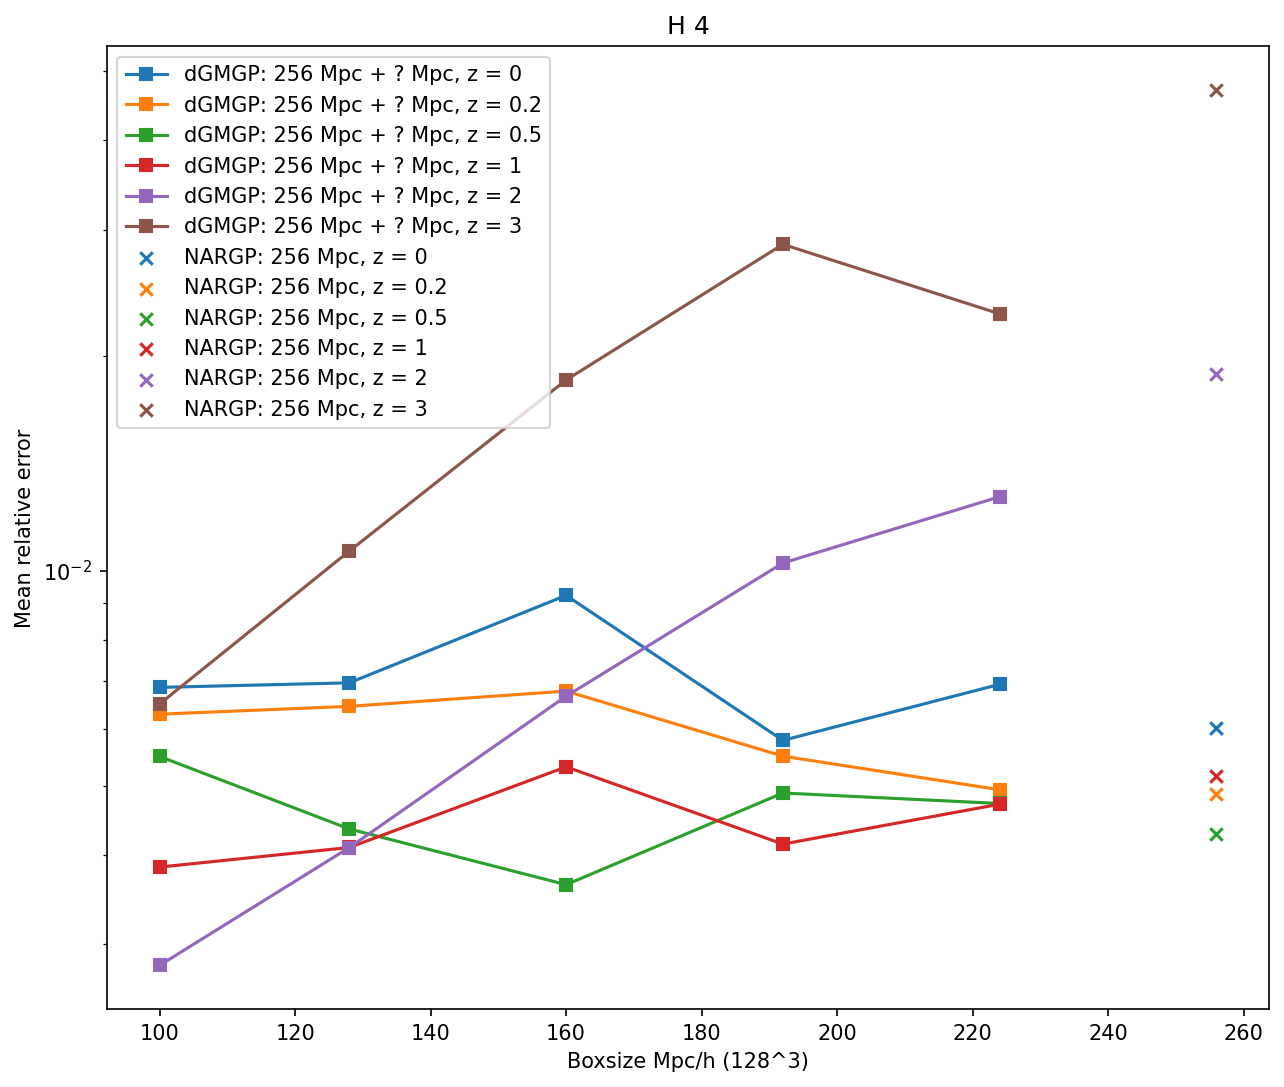

In [27]:
# mean particle spacing
k_mps = -100# 2 * np.pi * 128 / 512

type_mfemu = "dGMGP"

plt.figure(figsize=(10, 8.5))

z_errors = []
nargp_z_errors = []

for i,z in enumerate([0, 0.2, 0.5, 1, 2, 3]):

    # load predictive errors
    # all boxsizes
    all_boxes = [100, 128, 160, 192, 224]



    # all filenames
    all_base_folders = [
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box100_4_H-res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box128_4_H-res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box160_4_H-res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box192_4_H-res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_")),
        "../../matter_emu_dgmgp/data/output/dGMGP_60_L1-res128box256_60_L2-res128box224_4_H-res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_")),
    ]
    all_errors = []

    for base_dir in all_base_folders:
        ks = np.loadtxt(os.path.join(base_dir, type_mfemu, "kf"))

        pred_exacts = np.loadtxt(os.path.join(base_dir, type_mfemu, "pred_exacts"))

        ind = (10**ks > k_mps)

        error = np.abs(1 - pred_exacts).mean(axis=0)[ind]

        all_errors.append(np.mean(error))


    baseline = "../../matter_emu_dgmgp/data/output/Matterpower_60_res128box256_4_res512box256_z{}_ind-0-57-58-59/".format(str(z).replace(".", "_"))
    nargp_error = np.loadtxt(os.path.join(baseline, "NARGP", "pred_exacts"))
    ks = np.loadtxt(os.path.join(baseline, "NARGP", "kf"))
    ind = (10**ks > k_mps)
    nargp_error = np.abs(1 - nargp_error).mean(axis=0)[ind].mean()

    plt.semilogy(all_boxes, all_errors, "s-", label="dGMGP: 256 Mpc + ? Mpc, " + "z = {}".format(z), color="C{}".format(i))
    plt.scatter(256, nargp_error, marker="x", label="NARGP: 256 Mpc, " + "z = {}".format(z), color="C{}".format(i))

    
    # Append for later use
    z_errors.append(all_errors)
    nargp_z_errors.append(nargp_error)

    
plt.title("H 4")
plt.xlabel("Boxsize Mpc/h (128^3)")
plt.ylabel("Mean relative error")
plt.legend()

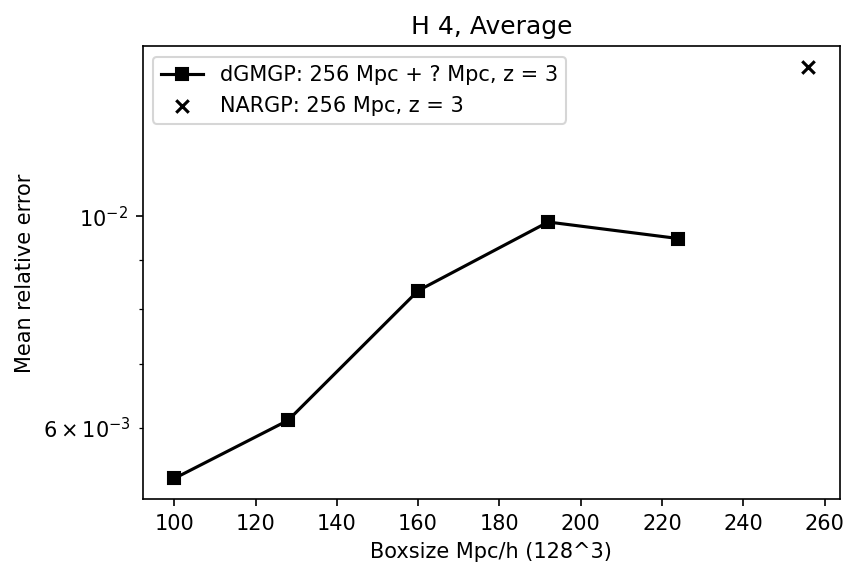

In [33]:

average_error = np.mean(z_errors, axis=0)
average_nargp_errpr = np.mean(nargp_z_errors)

plt.semilogy(all_boxes, average_error, "s-", label="dGMGP: 256 Mpc + ? Mpc, " + "z = {}".format(z), color="k")
plt.scatter(256, average_nargp_errpr, marker="x", label="NARGP: 256 Mpc, " + "z = {}".format(z), color="k")

    
plt.title("H 4, Average")
plt.xlabel("Boxsize Mpc/h (128^3)")
plt.ylabel("Mean relative error")
plt.legend()